# Jonathan Halverson
# Monday, August 7, 2017
# Chapter 6: Statistical machine learning

Structure-based for data-driven methods: Linear and logistic regression are said to be structure-based while KNN and tree methods are data-driven. Tree methods were released in 1984 by Breiman and Friedman in California. Bagging and boosting came out in the 1990's.

It is suggested to use Mahalanobis distance when working with features that may be correlated. This will treat correlate features as one instead of as individuals which will weight the distance. Gower's distance may also be considered since it handles mixed continuous and indicator variables and prevents the indicator variables from dominating the calculation of distance or variance. Mahalanobis is expensive and requires the calculation of the covariance matrix.

In [1]:
from sklearn.neighbors import DistanceMetric

In [2]:
X = [[-0.1, 1, 2.8],
     [3, 4.2, 5]]

In [3]:
dist = DistanceMetric.get_metric('euclidean')
dist.pairwise(X)

array([[ 0.       ,  4.9689033],
       [ 4.9689033,  0.       ]])

This is a convenience routine for the sake of testing.  For many
metrics, the utilities in scipy.spatial.distance.cdist and
scipy.spatial.distance.pdist will be faster.

In [4]:
dist = DistanceMetric.get_metric('manhattan')
dist.pairwise(X)

array([[ 0. ,  8.5],
       [ 8.5,  0. ]])

In [5]:
import numpy as np

dist = DistanceMetric.get_metric('mahalanobis', V=np.cov(X))
#dist.pairwise(X) appears that this has not been implemented yet

Of course, it is very important to standardize the features when using KNN.

In linear and logistic regression, one hot encoding causes a multicollinearity error. It works fine for tree-based models.

The bias-varance tradeoff: High variance results when the model is over fit and different training sets give large variation. Bias refers to more data not improving the fit because the model is lacking complexity. There is a balance between the structure of the data, the amount of data one has, and the complexity of the model.

### One-hot encoding

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame({'Age':[22.6, 34.1, 56.2], 'Type':['car', 'truck', 'frog']})
df

,Age,Type
0,22.6,car
1,34.1,truck
2,56.2,frog


In [8]:
from sklearn import preprocessing

type_encoder = preprocessing.LabelEncoder()
df['Type'] = type_encoder.fit_transform(df['Type'])
df

,Age,Type
0,22.6,0
1,34.1,2
2,56.2,1


In [9]:
enc = preprocessing.OneHotEncoder(sparse=False)
x = enc.fit_transform(df.Type.values.reshape(-1, 1))

In [10]:
df = pd.concat([df, pd.DataFrame(x)], axis=1, ignore_index=True)
df.columns = ['Age', 'Type', 'Car', 'Frog', 'Truck']
df

,Age,Type,Car,Frog,Truck
0,22.6,0,1.0,0.0,0.0
1,34.1,2,0.0,0.0,1.0
2,56.2,1,0.0,1.0,0.0


In [11]:
df = df.drop(['Type'], axis=1)
df

,Age,Car,Frog,Truck
0,22.6,1.0,0.0,0.0
1,34.1,0.0,0.0,1.0
2,56.2,0.0,1.0,0.0


It appears that Gower's distance is not implemented in Python.

In [12]:
dist = DistanceMetric.get_metric('manhattan')
dist.pairwise(df.values)

array([[  0. ,  13.5,  35.6],
       [ 13.5,   0. ,  24.1],
       [ 35.6,  24.1,   0. ]])

### Pandas approach to indicator variables

In [13]:
df = pd.DataFrame({'Age':[22.6, 34.1, 56.2], 'Type':['car', 'truck', 'frog']})
df

,Age,Type
0,22.6,car
1,34.1,truck
2,56.2,frog


In [14]:
pd.get_dummies(df)

,Age,Type_car,Type_frog,Type_truck
0,22.6,1,0,0
1,34.1,0,0,1
2,56.2,0,1,0


Just as Chi-square tests can be used to see if certain class outcomes show an evalated count with respect to certain features, one can use KNN to generate features. Because only a few other records are used for each record, multicollinearity is not introduced.

In [15]:
df = pd.read_csv('http://blog.yhat.com/static/misc/data/pigeon-racing.csv')
df['Length'] = df.Breeder.apply(lambda u: len(u.strip()))
df['SpeedLength'] = df.Speed / df.Length
df.head()

,Pos,Breeder,Pigeon,Name,Color,Sex,Ent,Arrival,Speed,To Win,Eligible,Length,SpeedLength
0,1,Texas Outlaws,19633-AU15-FOYS,NaN,BCWF,H,1,42:14.0,172.155,0:00:00,Yes,13,13.242692
1,2,Junior Juanich,0402-AU15-JRL,NaN,SIWF,H,1,47:36.0,163.569,0:05:21,Yes,14,11.683500
2,3,Jerry Allensworth,0404-AU15-VITA,Perch Potato,BB,H,1,47:41.0,163.442,0:05:27,Yes,17,9.614235
3,4,Alias-Alias,2013-AU15-ALIA,NaN,BBSP,H,1,47:43.0,163.392,0:05:28,Yes,11,14.853818
4,5,Greg Glazier,5749-AU15-SLI,NaN,BC,H,1,47:44.0,163.366,0:05:30,Yes,12,13.613833


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
Pos            400 non-null int64
Breeder        400 non-null object
Pigeon         400 non-null object
Name           20 non-null object
Color          400 non-null object
Sex            400 non-null object
Ent            400 non-null int64
Arrival        400 non-null object
Speed          400 non-null float64
To Win         400 non-null object
Eligible       400 non-null object
Length         400 non-null int64
SpeedLength    400 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 40.7+ KB


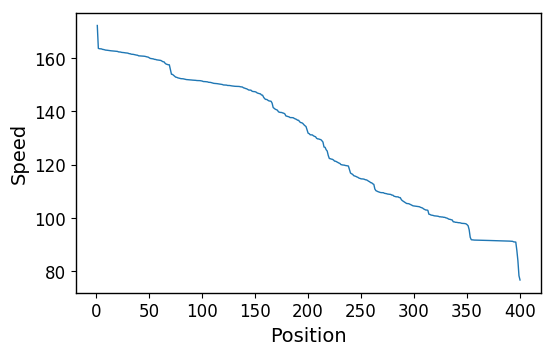

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

plt.plot(df.Pos, df.Speed)
plt.xlabel('Position')
plt.ylabel('Speed')

In [18]:
cf = df[['Pos', 'Length', 'SpeedLength']]
cf.head()

,Pos,Length,SpeedLength
0,1,13,13.242692
1,2,14,11.683500
2,3,17,9.614235
3,4,11,14.853818
4,5,12,13.613833


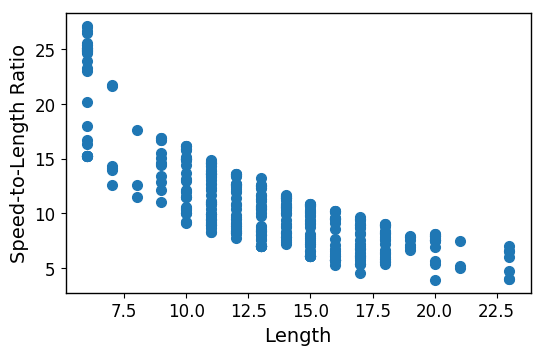

In [19]:
plt.scatter(cf.Length, cf.SpeedLength)
plt.xlabel('Length')
plt.ylabel('Speed-to-Length Ratio')

In [20]:
cf.corr()

,Pos,Length,SpeedLength
Pos,1.000000,-0.041135,-0.440014
Length,-0.041135,1.000000,-0.785767
SpeedLength,-0.440014,-0.785767,1.000000


In [21]:
def add_knn_feature(f):

     xf = f.copy()
     from sklearn.preprocessing import StandardScaler

     stdsc = StandardScaler()
     x = stdsc.fit_transform(xf[['Length', 'SpeedLength']])
     mf = pd.concat([xf.Pos, pd.DataFrame(x)], axis=1, ignore_index=True)
     mf.columns = xf.columns
     
     from sklearn.neighbors import KNeighborsClassifier

     knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
     knn = knn.fit(mf[['Length', 'SpeedLength']], mf.Pos)
     pred = knn.predict(mf[['Length', 'SpeedLength']])
     xf['Pred'] = pred
     
     return xf.copy()

In [23]:
z = add_knn_feature(cf)
z.head()

,Pos,Length,SpeedLength,Pred
0,1,13,13.242692,1
1,2,14,11.683500,2
2,3,17,9.614235,3
3,4,11,14.853818,4
4,5,12,13.613833,5


This demonstrates how to add a feature to a data frame.

### Trees

CART is classification and regression trees by Brieman and Friedman. Trees and their descendants, bagging with RF and boosting, and the most powerful and popular ML models for classification and regression. Pruning is a form of regularization. For classification the split is made based on impurity or information gain. Common measures are Gini or entropy. Gini is p(1-p), where p is the misclassification error and entropy is sum -p log2 p. The p varies between zero and 1/2. How to decide on the number of trees for RF? Plot the OOB error versus number of trees and look for the plateau.

RF can work out the feature importances. One way to do this is to examine the information gain when each feature is used. Another method is to shuffle the values for a given predictor and see how badly the records are misclassified. The worse the error the more important the feature is.

### Boosting

If bagging is a Honda Civic then boosting is a Porsche in the sense that it is more powerful but requires more care. Adaboost is the method I am most familiar with. It reweights the records depending on whether the previous tree got it correct or not. More weight is applied to the records that we misclassified. There is also gradient boosting and stochastic gradient boosting which are formulated using cost function. XGBoost is the most popular software and it comes from U. of Washington. I am not so familiar with all the parameters that need to set for boosting to be applied properly.